### Taller 5 :Gráficas

#### Ejercicio 1

Mediante la base de datos "covid19.db", realizar las siguientes gráficas en python:

•Histograma de casos confirmados

•Histograma de muertes confirmadas 

•Histograma de casos de recuperaciones 

•Adicionalmente se solicita crear un histograma que unifique los 3 histogramas anteriores (Las 3 gráficas en una sola), tenga en cuenta que como los datos tienen magnitudes muy diferentes, podria ser beneficioso normalizarlos 


In [188]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [86]:
#Conectar la base de datos
covid= "C:\\Users\\alexa\\Downloads\\covid19.db"
data=sqlite3.connect(covid)
#Query
query = """
SELECT 
	t.date,
	SUM(t.confirmed) as confirmed,
	SUM(t.deaths) as deaths,
	SUM(t.recovered) as recovered
from timeseries t 
WHERE t.id in (
	SELECT l.id
	from location l 
	WHERE l.iso_alpha_2 ="CO"
)
GROUP BY t.date 
ORDER BY t.date ASC 
"""
#dataframe
df=pd.read_sql_query(query,data)
#cerrar conexion 
data.close()

##### Histograma de casos confirmados 

Text(0, 0.5, 'Frecuencia')

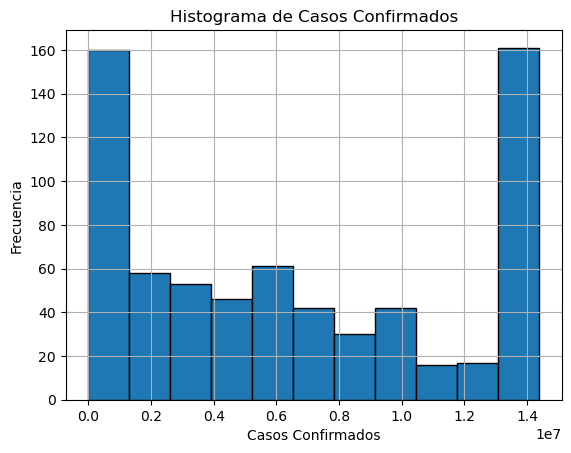

In [170]:
df["confirmed"].hist(bins="auto",edgecolor="black")
plt.title('Histograma de Casos Confirmados')
plt.xlabel('Casos Confirmados')
plt.ylabel('Frecuencia')


##### Histograma de muertes confirmadas

Text(0, 0.5, 'Frecuencia')

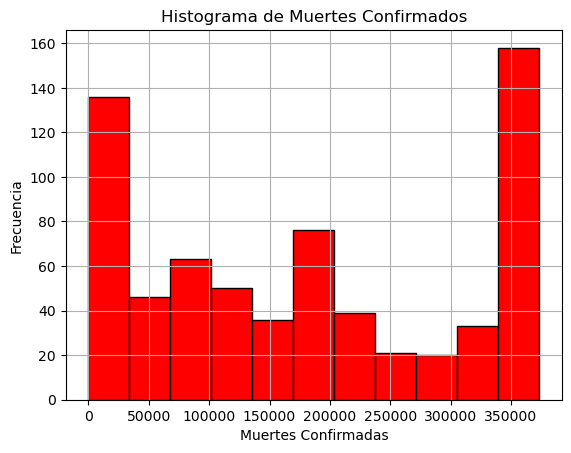

In [168]:
df["deaths"].hist(bins="auto",color="red",edgecolor="black")
plt.title('Histograma de Muertes Confirmados')
plt.xlabel('Muertes Confirmadas')
plt.ylabel('Frecuencia')

##### Histograma de casos de recuperaciones

Text(0, 0.5, 'Frecuencia')

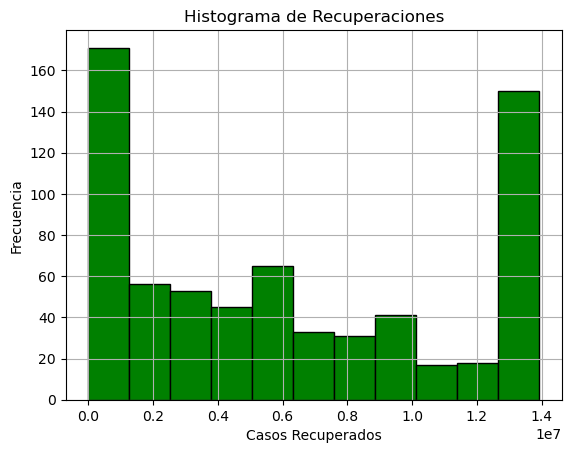

In [176]:
df["recovered"].hist(bins="auto",color="green",edgecolor="black")
plt.title('Histograma de Recuperaciones')
plt.xlabel('Casos Recuperados')
plt.ylabel('Frecuencia')

##### Datos Normalizados 

In [196]:
def normalizado(df):
    return(df-np.min(df))/(np.max(df)-np.min(df))
df["confirmed_norm"]=normalizado(df["confirmed"])
df["deaths_norm"]=normalizado(df["deaths"])
df["recovered_norm"]=normalizado(df["recovered"])

##### Histograma Combinado

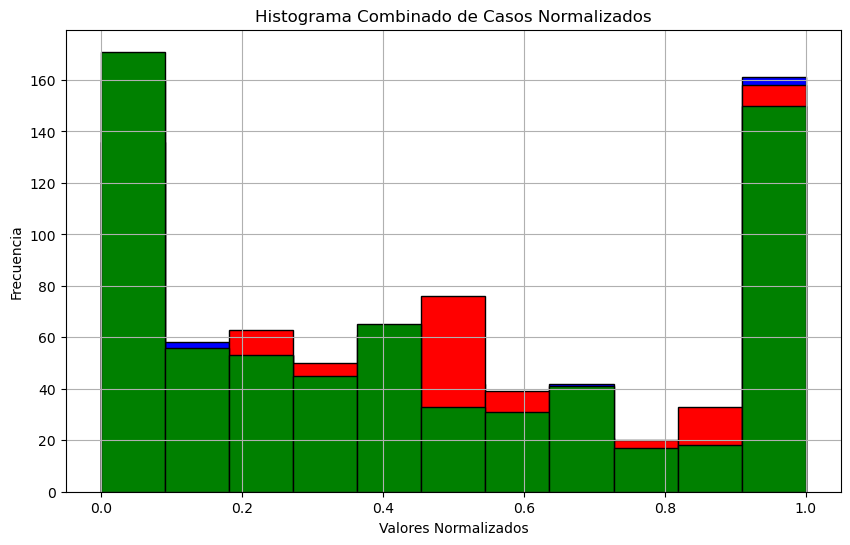

In [213]:
plt.figure(figsize=(10,6))
df["confirmed_norm"].hist(bins="auto",color="blue",edgecolor="black")
df["deaths_norm"].hist(bins="auto",color="red",edgecolor="black")
df["recovered_norm"].hist(bins="auto",color="green",edgecolor="black")
plt.title("Histograma Combinado de Casos Normalizados")
plt.xlabel("Valores Normalizados")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()